<a href="https://colab.research.google.com/github/Zia-Ul-Hasan/Churn-Prediction-IBM-telco/blob/main/Churn_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc

In [16]:
df=pd.read_excel('/content/Model_data.xlsx')

In [17]:
df=df.drop('State',axis=1)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7032 non-null   object 
 1   Senior Citizen     7032 non-null   object 
 2   Partner            7032 non-null   object 
 3   Dependents         7032 non-null   object 
 4   Tenure Months      7032 non-null   int64  
 5   Phone Service      7032 non-null   object 
 6   Multiple Lines     7032 non-null   object 
 7   Internet Service   7032 non-null   object 
 8   Online Security    7032 non-null   object 
 9   Online Backup      7032 non-null   object 
 10  Device Protection  7032 non-null   object 
 11  Tech Support       7032 non-null   object 
 12  Streaming TV       7032 non-null   object 
 13  Streaming Movies   7032 non-null   object 
 14  Contract           7032 non-null   object 
 15  Paperless Billing  7032 non-null   object 
 16  Payment Method     7032 

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


VARIABLE ENCODING


In [19]:
def encode_var (df_series):
  if df_series.dtype=='object':
    df_series= LabelEncoder().fit_transform(df_series)
    return df_series
  else:
    return df_series
df= df.apply (lambda x: encode_var(x))
df.head(4)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
1,0,0,0,1,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
2,0,0,0,1,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
3,0,0,1,1,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1


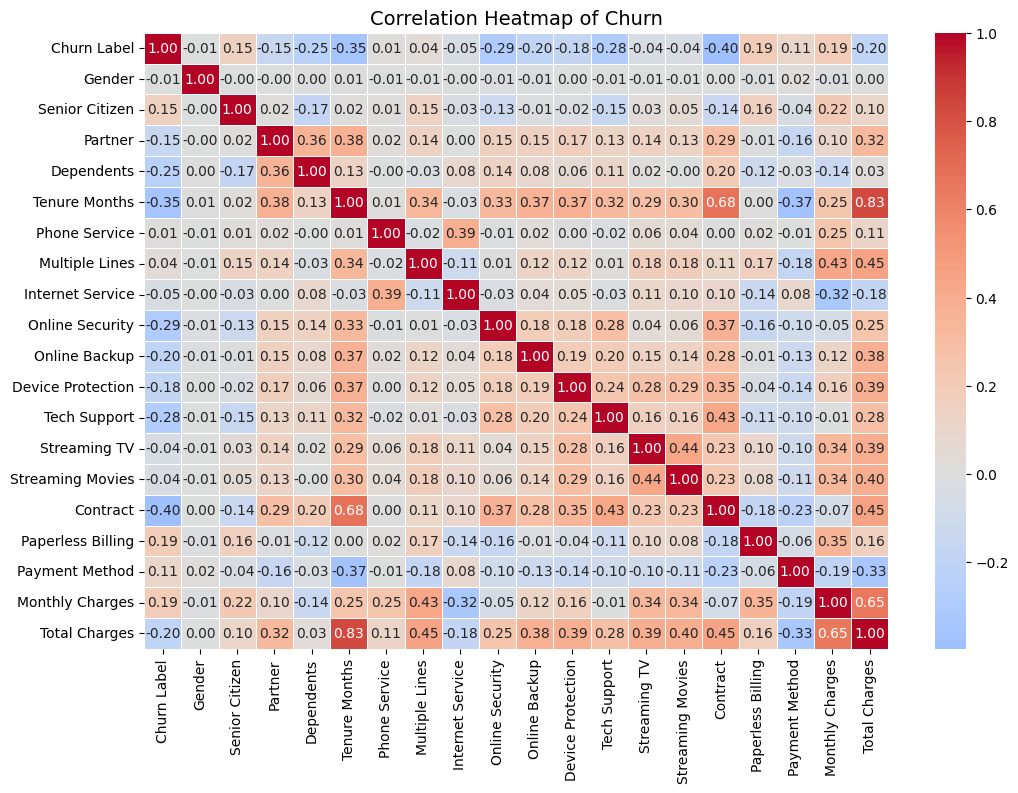

In [32]:
corr_matrix = df.corr()

cols = ['Churn Label'] + [col for col in corr_matrix.columns if col != 'Churn Label']
corr_matrix = corr_matrix[cols].loc[cols]

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)

plt.title("Correlation Heatmap of Churn", fontsize=14)
plt.show()


In [35]:
X = df.drop('Churn Label', axis=1)
y = df['Churn Label']
mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_df = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print(mi_df)

Contract             0.103273
Tenure Months        0.080317
Online Security      0.064516
Tech Support         0.059056
Internet Service     0.053441
Payment Method       0.052259
Device Protection    0.044381
Online Backup        0.043055
Monthly Charges      0.042384
Total Charges        0.042169
Dependents           0.039300
Streaming TV         0.036321
Streaming Movies     0.031236
Paperless Billing    0.013253
Partner              0.011834
Multiple Lines       0.008153
Senior Citizen       0.004921
Phone Service        0.003764
Gender               0.000376
dtype: float64


FEATURE SELECTION

lets drop the feautures with low mustual gain or very low correlation

In [39]:
X= df.drop(['Gender','Senior Citizen','Partner','Phone Service','Multiple Lines','Total Charges'],axis=1)

lets check for imabalances

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)
print(Y_train.value_counts(normalize=True))
print(Y_test.value_counts(normalize=True))

Churn Label
0    0.734254
1    0.265746
Name: proportion, dtype: float64
Churn Label
0    0.734123
1    0.265877
Name: proportion, dtype: float64


In [53]:
x_no_ch= X_train[Y_train==0]
x_ch= X_train[Y_train==1]
y_no_ch= Y_train[Y_train==0]
y_ch= Y_train[Y_train==1]


x_ch_sam, y_ch_sam= resample(x_ch,y_ch,replace=True , n_samples=len(x_no_ch), random_state=42)

X_train= pd.concat([x_no_ch,x_ch_sam])
Y_train= pd.concat([y_no_ch,y_ch_sam])

In [58]:
new_trainy_dist = Y_train.value_counts(normalize=True) * 100
print(new_trainy_dist)

Churn Label
0    50.0
1    50.0
Name: proportion, dtype: float64


DIFFERENT MODELS
